Elisa Stabilini - 28326A

# Tema d'esame 24/01/23

Obiettivo di questo lavoro è l'analisi degli investimenti per la ricerca e sviluppo a livello nazionale (lordo) per settore di presteazione e lo studio di come questo è variato nel tempo. Inoltre si vuole osservare come questo è legato alla condizione geopolitoca dello stato.

Il notebook è organizzato come segue: per prima cosa è riportata la consegna dell'esercizio e sono importate le librerie necessarie all'analisi dati, dopo di che sono importati e presentati i dati (si spiega come sono organizzati). A questo punto, prima di una analisi generali dei dati il dataframe viene ripulito e riorganizzato. 

Le prime analisi qualitative sono state fatte con lo scopo di individuare i principali trend degli investimenti nel tempo e la loro distribuzione all'interno delle siverse regioni geopolitiche.

Dopo di che sono presentati alcuni studi di significatività statistica e un fit

In ultimo sono presentate le conclusioni dell'analisi.

## Consegna

Il database (fonte OCSE) contiene statistiche sulla spesa per ricerca e sviluppo (R&S) a livello nazionale lordo per settore di prestazione (imprese, governo, istruzione superiore, privato senza scopo di lucro e totale intramurale) e per settore scientifico (scienze naturali, ingegneria, scienze mediche, scienze agricole, scienze sociali e umanistiche). I dati riguardano gli anni dal 1981 al 2009. Si richiede di preparare un notebook in python in cui si analizzano questi dati. Il notebook deve contenere da un minimo di 4 a un massimo di 8 figure, deve essere commentato. Il notebook deve contenere:
1. uno studio qualititavo, 
2. una analisi di significatività statistica 
3. un fit.

**Importazione librerie**

In [1]:
%matplotlib inline
import pandas as pd
from scipy.stats import trim_mean
import statsmodels
from statsmodels import robust

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

## Importazione e visualizzazione dataframe

In [4]:
df = pd.read_csv("../TemiEsame/data/GERD_SCIENCE_17012023090805122.csv")

In [5]:
df

,SECTOR,Sector of Performance,SCIENCE,Field of Sciences,UNITS_EXP,Measure,COU,Country,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1981,1981,AUD,Australian Dollar,6,Millions,NaN,NaN,396.600,c,National estimate or projection
1,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1983,1983,AUD,Australian Dollar,6,Millions,NaN,NaN,506.800,c,National estimate or projection
2,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1984,1984,AUD,Australian Dollar,6,Millions,NaN,NaN,721.300,c,National estimate or projection
3,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1985,1985,AUD,Australian Dollar,6,Millions,NaN,NaN,947.900,c,National estimate or projection
4,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1986,1986,AUD,Australian Dollar,6,Millions,NaN,NaN,1280.100,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70472,TIM,Total intramural,HUM,Humanities,DF6,2010 Dollars - Constant prices and PPPs,GBR,United Kingdom,2012,2012,USD,US Dollar,6,Millions,2010.0,2010.0,2312.793,c,National estimate or projection
70473,TIM,Total intramural,HUM,Humanities,DC6,PPP Dollars - Current prices,GBR,United Kingdom,2012,2012,USD,US Dollar,6,Millions,NaN,NaN,2393.271,c,National estimate or projection
70474,HE,Higher education,NEC,Not elsewhere classified (Fields of Science),NC6,National Currency,DNK,Denmark,2012,2012,DKK,Danish Krone,6,Millions,NaN,NaN,68.000,NaN,NaN
70475,HE,Higher education,NEC,Not elsewhere classified (Fields of Science),DF6,2010 Dollars - Constant prices and PPPs,DNK,Denmark,2012,2012,USD,US Dollar,6,Millions,2010.0,2010.0,8.711,NaN,NaN


In [7]:
df.head(10)

,SECTOR,Sector of Performance,SCIENCE,Field of Sciences,UNITS_EXP,Measure,COU,Country,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1981,1981,AUD,Australian Dollar,6,Millions,NaN,NaN,396.6,c,National estimate or projection
1,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1983,1983,AUD,Australian Dollar,6,Millions,NaN,NaN,506.8,c,National estimate or projection
2,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1984,1984,AUD,Australian Dollar,6,Millions,NaN,NaN,721.3,c,National estimate or projection
3,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1985,1985,AUD,Australian Dollar,6,Millions,NaN,NaN,947.9,c,National estimate or projection
4,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1986,1986,AUD,Australian Dollar,6,Millions,NaN,NaN,1280.1,NaN,NaN
5,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1987,1987,AUD,Australian Dollar,6,Millions,NaN,NaN,1455.7,NaN,NaN
6,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1988,1988,AUD,Australian Dollar,6,Millions,NaN,NaN,1798.3,NaN,NaN
7,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1989,1989,AUD,Australian Dollar,6,Millions,NaN,NaN,1989.7,NaN,NaN
8,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1990,1990,AUD,Australian Dollar,6,Millions,NaN,NaN,2099.8,NaN,NaN
9,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1991,1991,AUD,Australian Dollar,6,Millions,NaN,NaN,2364.6,NaN,NaN


**Descrizione dataframe**

Per prima cosa guardo che tipo di informazioni contiene il file. Ogni dato è rappresentato da una riga con 19 entries (la colonna 0 è la colonna degli indici associati al dato):

1. Sigla che indica il settore (BE, GV, HE, PNP, TIM)
2. Nome esteso del settore (Business Enterprise, Government, Higher Education, Private Non-Profit, Total Intarmural)
3. Sigla del tipo di *scienza* (AGR, ENG, HUM, MED, NAT, NEC,NSE, SOC, SSH, TOTAL_S)
4. Nome esteso del tipo di *scienza* (Agricultural Sciences, Engeneering and Technology, Humanities, Medical and Health Sciences, Natural Sciences, Not Elsewhere Classified, Natural Sciences and Engeneering, Social Sciences, Social Sciences  and Humanities, All fields of Science science)
5. Unità in cui sono espressi i valori(DC6, DF6, NC6)
6. Nome esteso dell'unità in cui sono espressi (PPP Dollars, 2010 Dollars, National Currency)
7. Sigla per il paese di riferimento
8. Nome per esteso del paese di riferimento
9. Anno
10. Anno
11. Codice della valuta in cui è stata eseguita la misurazione
12. Nome esteso della valuta
13. Codice dell'ordine di grandezza, tutti gli investimenti sono espressi in potenza 6
14. Nome esteso dell'ordine di grandezza, tutti gli investimenti sono espressi in milioni
15. Codice per il periodo di riferimento: può essere o niente o il 2010
16. Indicazione estesa del periodo di riferimento
17. Valore dell'investimento
18. Codice che indica come la stima è stata fatta
19. Nome esteso del metodo con cui è stata ottenuta la stima

### Pulizia e ri-organizzazione dei dati

La prima cosa che osservo studiando il dataset è che in realtà i dati sono stati raccolti dal 1981 fino al 2015, non fino al 2009. Controllando quali sono i dati che presentano un investimento nullo sono solo quelli relativi alla Slovacchia nel periodo che va dal 1994 al 2001, per evitare problemi con l'analisi dati elimino questo set.

Inoltre elimino anche i dati per cui il valore dell'investimento non è riportato.

In [8]:
df = df.loc[(df.Value != 0)]

Le colonne per cui il dato del valore dell'investimento non è riportato sono quelle per cui il Flag Codes corrisponde a "n", per selezionarle ho bisogno di rinominare la colonna. In generale rinomino tutte le colonne per poter poi avere accesso alle variabili che mi interessano più facilmente.

In [9]:
print(df.columns)

Index(['SECTOR', 'Sector of Performance', 'SCIENCE', 'Field of Sciences',
       'UNITS_EXP', 'Measure', 'COU', 'Country', 'YEAR', 'Year', 'Unit Code',
       'Unit', 'PowerCode Code', 'PowerCode', 'Reference Period Code',
       'Reference Period', 'Value', 'Flag Codes', 'Flags'],
      dtype='object')


In [10]:
df.columns = ['SECTOR', 'Sector_of_Performance', 'SCIENCE', 'Field_of_Sciences',
       'UNITS_EXP', 'Measure', 'COU', 'Country', 'YEAR', 'Year', 'Unit_Code',
       'Unit', 'PowerCode_Code', 'PowerCode', 'Reference_Period_Code',
       'Reference_Period', 'Value', 'Flag_Codes', 'Flags']

In [11]:
df=df.loc[(df.Flag_Codes != "n")]

A questo punto creo un nuovo dataframe *df_new* che contiene le colonne del dataframe originario che sembrano più interessanti e più importanti per l'analisi dati. Nello specifico mantengo tutte le colonne che contengono le informazioni rappresentate mediante codici. Eliminio inoltre le colonne per cui i valori sono uguali per tutti i dati, nello specifico elimino le colonne *PowerCode_Code* e *PowerCode*.

In [12]:
sector = list(df["SECTOR"])
science = list(df["SCIENCE"])
units = list(df["UNITS_EXP"])
country = list(df["COU"])
year = list(df["YEAR"])
unit = list(df["Unit_Code"])
refperiod = list(df["Reference_Period_Code"])
value = list(df["Value"])

df_new = pd.DataFrame({'Sector':sector, 'Science':science, 'Units':units, 'Country':country, 'Year':year, 'Unit':unit, 'RefPeriod':refperiod, 'Value':value})
df_new.head(10)

,Sector,Science,Units,Country,Year,Unit,RefPeriod,Value
0,BE,TOTAL_S,NC6,AUS,1981,AUD,NaN,396.6
1,BE,TOTAL_S,NC6,AUS,1983,AUD,NaN,506.8
2,BE,TOTAL_S,NC6,AUS,1984,AUD,NaN,721.3
3,BE,TOTAL_S,NC6,AUS,1985,AUD,NaN,947.9
4,BE,TOTAL_S,NC6,AUS,1986,AUD,NaN,1280.1
5,BE,TOTAL_S,NC6,AUS,1987,AUD,NaN,1455.7
6,BE,TOTAL_S,NC6,AUS,1988,AUD,NaN,1798.3
7,BE,TOTAL_S,NC6,AUS,1989,AUD,NaN,1989.7
8,BE,TOTAL_S,NC6,AUS,1990,AUD,NaN,2099.8
9,BE,TOTAL_S,NC6,AUS,1991,AUD,NaN,2364.6


Dato che gli investimenti nei diversi settori sono riportati in valute differenti uniformo tutti i valori utilizzando la stessa unità di misura. Per comoditàà sclego di utilizzare il dollaro statunitense ovvero la valuta più presente all'interno del dataframe, insieme a questa operazione che riguarda di fatto la colonna in cui sono espressi i valori degli investimenti, dovrò uniformare di conseguenza anche le colonne riguardaanti l'unità di misura ovvero *UNITS_EXP*, *MEASURE*, *UNITE_CODE* e *UNIT*.

Per fare questo importo una nuova libreria di python.

In [13]:
from currency_converter import CurrencyConverter

In [14]:
c = CurrencyConverter()

In [15]:
curr = c.currencies

Controllo che nella libreria che ho importato ci siano tutte le valute di cui hao bisogno

In [16]:
valute = df["Unit_Code"].unique()

In [17]:
currency = list(curr)
currency.sort()
valute.sort()

In [18]:
for val in valute:
    if val not in currency:
        print(val)

ARS
CLP
TWD


Dato che per questi paesi non riesco a convertire il valore degli investimenti in dollari statunitensi elimino dalla analisi dei dati il l'Argentina e il Cile, Taiwan. Non elimino semplicemente i dati a per cui gli investimenti sono espressi in queste valute perchè se nel tempo la valuta con cui il valore degli investimenti è espresso fosse cambiato l'analisi dati peggiorerebbe (analizzerei per questi paesi solo dei dati parziali).

In [19]:
df_new = df_new.loc[(df_new.Country != "ARG")]

In [20]:
df_new = df_new.loc[(df_new.Country != "TWN")]

In [21]:
df_new = df_new.loc[(df_new.Country != "CHL")]

Faccio un ulteriore controllo per verificare che non ci fossero anche investimenti di altri paesi espressi nelle valute nazionali di Argentina, Taiwan e Cile.

In [22]:
valute = df_new["Unit"].unique()

for val in valute:
    if val not in currency:
        print(val)

A questo punto devo convertire tutti i valori del data frame *df_new* in dollari statunitensi. Più precisamente, a partire da *df_new* creo un nuovo data frame che contiene come colonne solamente il valore dell'investimento e il codice della valuta in cui l'investimento è espresso.

In particolare, per ora faccio la conversione di tutte le valute nel valore attuale del dollaro, in un secondo momento farò la conversione per far si che tutti i valori siano espressi nel valore del dollaro del 2010 (e non il valore del dollaro nel momento in cui è stata fatta la misura, ovvero non il valore che il dollaro aveva nell'anno di riferimento.

In [23]:
sector = list(df_new["Sector"])
science = list(df_new["Science"])
units = list(df_new["Units"])
country = list(df_new["Country"])
year = list(df_new["Year"])
curr = list(df_new["Unit"])
refperiod = list(df_new["RefPeriod"])
value = list(df_new["Value"])

df_partial = pd.DataFrame({'Currency':curr, 'RefPeriod':refperiod, 'Value':value})

valore = df_partial["Value"].values.tolist()
valute = df_partial["Currency"].values.tolist()

In [24]:
for i in range(len(valore)):
    if valute[i] != "USD":
        v = c.convert(valore[i], valute[i], "USD")
        valore[i] = v
        valute[i] = "USD"

A questo punto controllo che effettivamente tutti i valori siano espressi in dollari.

In [25]:
for vlt in valute:
    if vlt != "USD":
        print("err")

A questo punto, dato che so con certezza che tutti i valori sono espressi in dollari statunitensi, quello che devo fare è convertire i valori espressi in dollari del 2010 in valori del dollaro attuali.

In [26]:
df_partial = pd.DataFrame({'Currency':valute, 'RefPeriod':refperiod, 'Value':value})

valore = df_partial["Value"].values.tolist()
valute = df_partial["Currency"].values.tolist()
ref = df_partial["RefPeriod"].values.tolist()

In [27]:
for i in range(len(ref)):
    if ref[i] == 2010:
        v = valore[i]*1.36 ##conversione dal 2010 al valore attuale

A questo punto creo un nuovo dataframe da cui elimino le informazioni relative all'unità di misura in cui sono espressi gli investimenti in ricerca e sviluppo, al periodo a cui questi valori sono riferiti.

In [28]:
sector = list(df_new["Sector"])
science = list(df_new["Science"])
units = list(df_new["Units"])
country = list(df_new["Country"])
year = list(df_new["Year"])
curr = list(df_new["Unit"])
refperiod = list(df_new["RefPeriod"])
value = list(df_new["Value"])

df_final = pd.DataFrame({'Sector':sector, 'Science':science, 'Country':country, 'Year':year, 'Value':value})

In [29]:
df_final

,Sector,Science,Country,Year,Value
0,BE,TOTAL_S,AUS,1981,396.600
1,BE,TOTAL_S,AUS,1983,506.800
2,BE,TOTAL_S,AUS,1984,721.300
3,BE,TOTAL_S,AUS,1985,947.900
4,BE,TOTAL_S,AUS,1986,1280.100
...,...,...,...,...,...
61232,TIM,HUM,GBR,2012,2312.793
61233,TIM,HUM,GBR,2012,2393.271
61234,HE,NEC,DNK,2012,68.000
61235,HE,NEC,DNK,2012,8.711


## Primo studio dei dati

I dati presenti nel dataset possono essere raggruppati in modi differenti, si possono considerare gli investimenti complessivi effettuati dai diversi stati, in periodi storici diversi, in ambiti "scientifici" diversi. Sulla base delle informazioni che vogliamo estrarre sicuramente possiamo raggruppare i dati in modo diverso, l'aspetto importante rimane sempre quello eprò di distinguere le diverse valute in cui sono espressi gli investimenti.

Ad esempio, indagando i diversi settori di investimento nei diversi periodi storici, si potrebbero osservare tendenze utili ad interpretare il clima economico, politico e sociale nei diversi stati (o in diverse aree del globo in momenti diversi). 

Un'alternativa interessante potrebbe essere quella di studiare i dati suddividendoli sulla base della valuta in cui sono espressi gli investimenti, in questo modo sostanzialmente si potrebbe studiare la distribuzione sui vari settori degli investimenti in una determinata area geopolitica.

Visto il tipo di analisi che voglio fare è utile utilizzare la libreria *coutnrygroups*

In [30]:
from countrygroups import EUROPEAN_UNION as EU

In [31]:
from countrygroups import G20

In [32]:
from countrygroups import G7

In [33]:
from countrygroups import UNSTATS_GEOGRAPHICAL_REGIONS as UGR

In [34]:
states = df_new["Country"].unique()

In [35]:
states.sort()
states

array(['AUS', 'AUT', 'BEL', 'CAN', 'CHE', 'CHN', 'CZE', 'DEU', 'DNK',
       'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HUN', 'IRL', 'ISL',
       'ISR', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX', 'NLD', 'NOR', 'NZL',
       'POL', 'PRT', 'ROU', 'RUS', 'SGP', 'SVK', 'SVN', 'SWE', 'TUR',
       'USA', 'ZAF'], dtype=object)

In [36]:
G7.sort()
G7

['CAN', 'DEU', 'EUU', 'FRA', 'GBR', 'ITA', 'JPN', 'USA']

In [37]:
print(G7.names)

['Canada', 'European Union', 'France', 'Germany', 'Italy', 'Japan', 'USA', 'United Kingdom']


Dato che l'unione europea fa parte del G7 anche come regione economica oltre che tramite alcuni dei suoi stati, per analizzare le regioni economiche per prima cosa devo riunire *in un unico stato* gli stati dell'Unione Europea che non fanno singolarmente parte del G7.

In [38]:
outEU = []
inEU = []

outG20 = []
inG20 = []

for state in states:
    if state in EU or state=="GBR":
        inEU.append(state)
    elif state in G20:
        inG20.append(state)
    else:
        outG20.append(state)        

In [39]:
print(inEU)
print(inG20)
print(outG20)

['AUT', 'BEL', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HUN', 'IRL', 'ITA', 'LUX', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'SWE']
['AUS', 'CAN', 'CHN', 'JPN', 'KOR', 'MEX', 'RUS', 'TUR', 'USA', 'ZAF']
['CHE', 'ISL', 'ISR', 'NOR', 'NZL', 'SGP']


In [40]:
EUUstates = []

for cou in inEU:
    if cou not in G7:
        EUUstates.append(cou)
        
print(EUUstates)

['AUT', 'BEL', 'CZE', 'DNK', 'ESP', 'EST', 'FIN', 'GRC', 'HUN', 'IRL', 'LUX', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'SWE']


A questo punto ho quattro macoaree economiche: paesi UE non nel G7, paesi del G7, paesi del G20, paesi fuori dal G20

In questo modo ho suddiviso gli stati in delle macroaree che possono essere più facilmente studiate.

Utilizzo questi tre gruppi come gruppi per l'analisi.

### Investimenti per macroaree nei diversi settori

In [41]:
sec = df_final["Sector"].unique()

Per ciascuno stato devo clacolare l'investimento medio sui 30 anni all'interno di ciascun settore.

In [42]:
states = df_final["Country"]
area = []

for state in states:
    if state in EUUstates:
        area.append("EUU")
    elif state in G7:
        area.append("G7")
    elif state in G20:
        area.append("G20")
    else:
        area.append("other")
    
df_final = pd.DataFrame({'Sector':sector, 'Science':science, 'Country':country, 'Year':year, 'Value':value, 'Area':area})

In [43]:
df_final

,Sector,Science,Country,Year,Value,Area
0,BE,TOTAL_S,AUS,1981,396.600,G20
1,BE,TOTAL_S,AUS,1983,506.800,G20
2,BE,TOTAL_S,AUS,1984,721.300,G20
3,BE,TOTAL_S,AUS,1985,947.900,G20
4,BE,TOTAL_S,AUS,1986,1280.100,G20
...,...,...,...,...,...,...
61232,TIM,HUM,GBR,2012,2312.793,G7
61233,TIM,HUM,GBR,2012,2393.271,G7
61234,HE,NEC,DNK,2012,68.000,EUU
61235,HE,NEC,DNK,2012,8.711,EUU


Realizzo un boxplot in cui il valore dell'investimento medio nel periodo che va dal 1981 al 2010 è rappresentato rispetto alle categorie del settore di investimento. Nel boxplot gli stati sono separati in macroaree dal punto di vista economico.

Dato che gli investimenti nei diversi settori compiuti dai quattro soggetti economici individuati variano di molto, provo a studiarne il logaritmo, in questo modo posso avere una visione chiara sia di quello che avviene per bassi investimenti che per investimenti relativi a cifre maggiori.

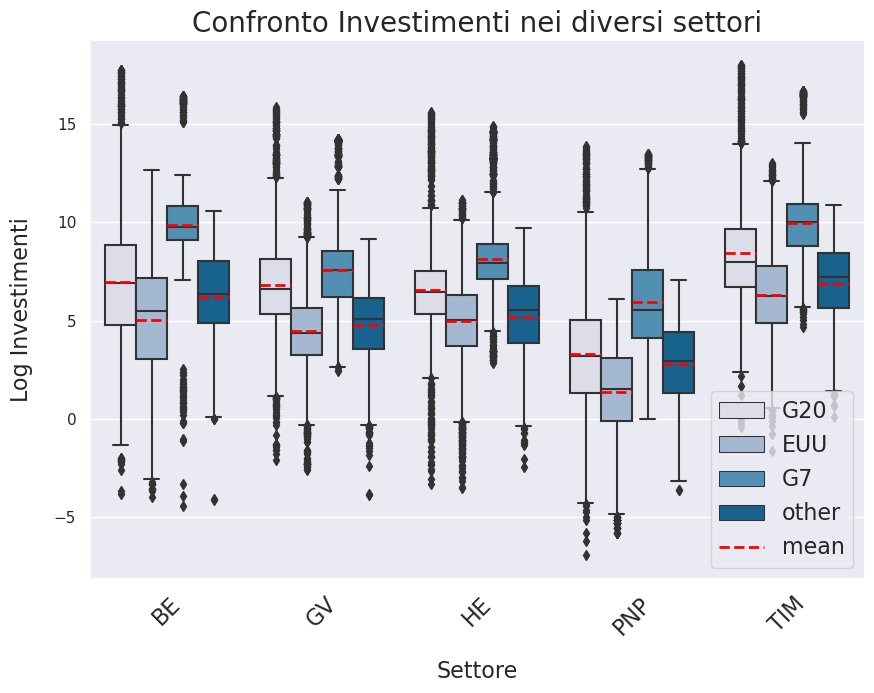

In [44]:
df_final["logmedio"]=np.log(df_final["Value"])
sns.set(rc = {'figure.figsize':(10,7)})

meanprops=dict(c='red',lw=2)
ax=sns.boxplot(data=df_final, x="Sector", y="logmedio", hue="Area", showfliers=True, showmeans=True, meanline=True, meanprops=meanprops, palette="PuBu")
 
# Costruisco una legenda che contenga anche l'informazione sulla media
custom_lines = [Line2D([0], [0], color='red', lw=2,ls='--')]
handles, l = ax.get_legend_handles_labels()         
handles1 = np.append(handles,custom_lines)
l1=np.append(l, "mean")
ax.legend(handles1, l1, loc="best", fontsize=16)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=16)

#plt.ylim((0,8e4))
ax.set_xlabel('Settore', fontsize=16, labelpad=15)
ax.set_ylabel('Log Investimenti', fontsize=16, labelpad=15)
ax.set_title("Confronto Investimenti nei diversi settori", fontsize=20);

Per completare l'analisi faccio un plot dell'investimento complessivo medio suddiviso per scienze a livello globale. (In questo caso per "livello globale si intende "su tutti gli stati che ho a disposizione").

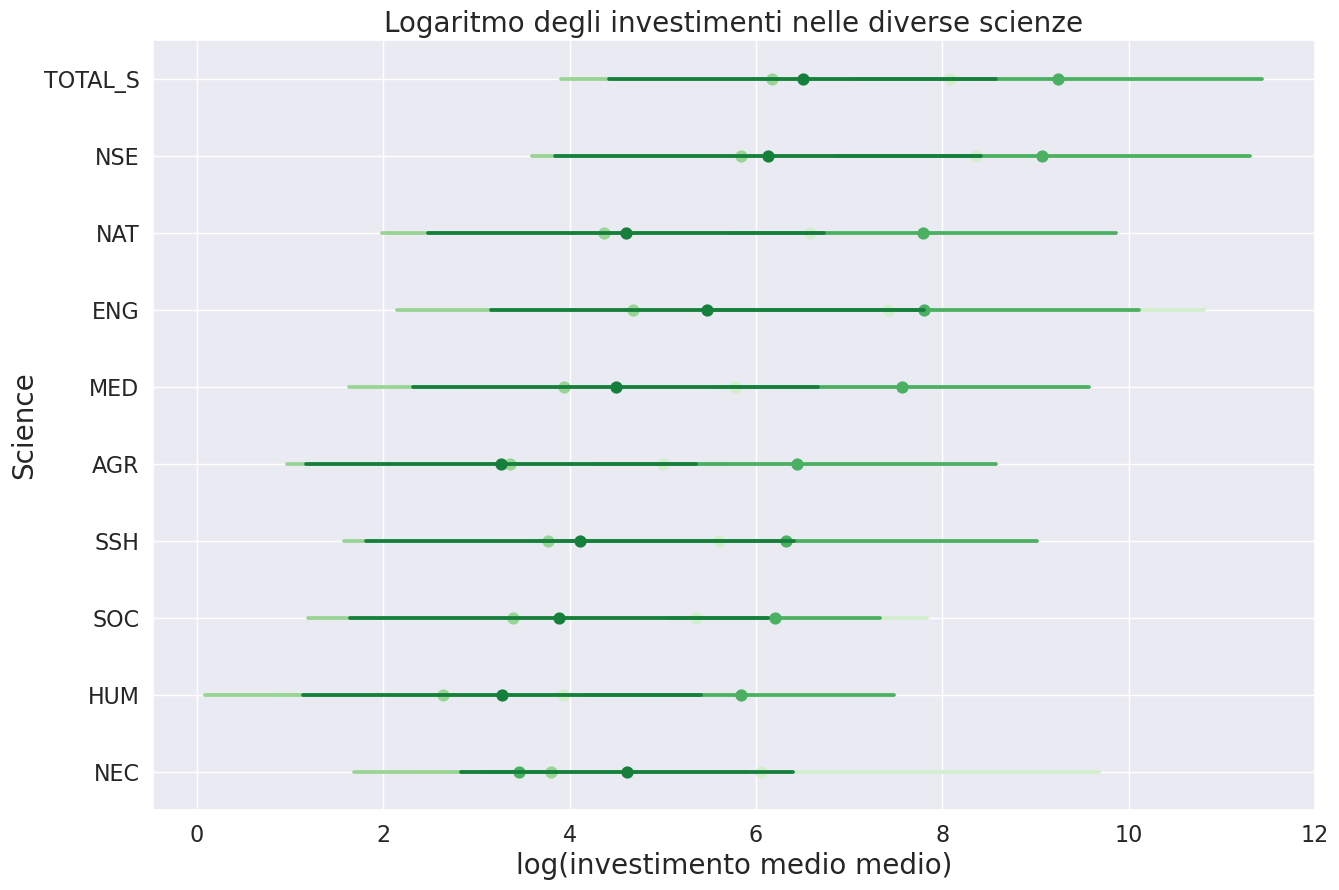

In [45]:
plt.figure(figsize=(15, 10))

ax = sns.pointplot(data = df_final, x = "logmedio", y = "Science", hue='Area', palette="Greens", errorbar='sd', join=False)
ax.set_xlabel(r"log(investimento medio medio)", fontsize = 20)
ax.set_ylabel("Science", fontsize = 20)
ax.set_title("Logaritmo degli investimenti nelle diverse scienze", fontsize = 20)
plt.legend([],[], frameon=False)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
ax.grid(True)
plt.show()

#a questo grafico va inserita una legenda

## Andamento del range di investimenti nel tempo

In [46]:
sns.set_theme(
    "notebook", rc={"figure.dpi": 150, "legend.fontsize": 15, "legend.title_fontsize": 20}, font_scale=1.8
)

**Metodologia di analisi**

Definisco la differenza percentuale di prezzo tra il valore massimo e il minimo, per entrambi i dati, in modo da poterne studiare la volatilità. Per ciascun anno, all'interno di ciascun settore di scienza individuo gli stati che hanno effettuato l'investimento massimo e minimo, questi saranno considerati, rispettivamente l'investimento massimo e minimo.

In [47]:
anno = df_final["Year"].unique()

In [48]:
print(anno)

[1981 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 1982 2014 2015]


In [49]:
maxs = df_final.groupby(["Year", "Science", "Area"]).max()
mins = df_final.groupby(["Year", "Science", "Area"]).min()
means = df_final.groupby(["Year", "Science", "Area"]).mean()

Devo creare una routine che calcoli la differenza percentuale tra due anni per area e scienza fissate. Ricordo che calcolo la differenza percentuale come differenza tra i valori massimo e minimo e divido per il valore medio.

In [50]:
print(maxs)
print(mins)
print(means)

                   Sector Country         Value   logmedio
Year Science Area                                         
1981 AGR     EUU      PNP     SWE  3.270000e+02   5.789960
             G20       HE     AUS  7.189400e+01   4.275193
             G7       PNP     USA  7.224500e+04  11.187818
             other     HE     NOR  7.900000e+01   4.369448
     ENG     EUU      PNP     SWE  8.290000e+02   6.720220
...                   ...     ...           ...        ...
2015 SSH     other     HE     ISL  5.773400e+03   8.661016
     TOTAL_S EUU      TIM     EST  5.697140e+02   6.345134
             G20      TIM     RUS  6.595937e+07  18.004550
             G7       TIM     JPN  1.743605e+07  16.674051
             other    TIM     ISL  4.850700e+04  10.789463

[1235 rows x 4 columns]
                   Sector Country     Value  logmedio
Year Science Area                                    
1981 AGR     EUU       GV     AUT     0.050 -2.995732
             G20       HE     AUS    33.700  3

Creo un dataframe di indicatori statistici. Per ogni riga questo dataframe contiene il valore massimo, il valore minimo e il valore medio degli investimenti in un determinato settore in un determinato.

Dopo di che a partire dal 1982 in avanti questo dataframe conterrà anche una colonna contenente i valori della differenza e della differenza percentuale. Si noti che in questo nuovo dataframe sarà assente la colonna indicando il logaritmo dei valori degli indicatori statistici selezionati.

In [64]:
statsind = maxs
statsind.drop('logmedio', axis=1)

Sector Country         Value
Year Science Area                              
1981 AGR     EUU      PNP     SWE  3.270000e+02
             G20       HE     AUS  7.189400e+01
             G7       PNP     USA  7.224500e+04
             other     HE     NOR  7.900000e+01
     ENG     EUU      PNP     SWE  8.290000e+02
...                   ...     ...           ...
2015 SSH     other     HE     ISL  5.773400e+03
     TOTAL_S EUU      TIM     EST  5.697140e+02
             G20      TIM     RUS  6.595937e+07
             G7       TIM     JPN  1.743605e+07
             other    TIM     ISL  4.850700e+04

[1235 rows x 3 columns]

In [65]:
statsind = statsind.rename(columns={'Value': 'Max'})

In [66]:
statsind["Min"] = mins["Value"]
statsind["Mean"] = means["Value"]
statsind["Diff"] = (statsind.Max - statsind.Min)
statsind["Diff_perc"] = (statsind.Diff/statsind.Mean)

In [76]:
statsind

Sector Country           Max   logmedio       Min  \
Year Science Area                                                      
1981 AGR     EUU      PNP     SWE  3.270000e+02   5.789960     0.050   
             G20       HE     AUS  7.189400e+01   4.275193    33.700   
             G7       PNP     USA  7.224500e+04  11.187818    26.049   
             other     HE     NOR  7.900000e+01   4.369448     0.590   
     ENG     EUU      PNP     SWE  8.290000e+02   6.720220     0.025   
...                   ...     ...           ...        ...       ...   
2015 SSH     other     HE     ISL  5.773400e+03   8.661016     1.556   
     TOTAL_S EUU      TIM     EST  5.697140e+02   6.345134     5.436   
             G20      TIM     RUS  6.595937e+07  18.004550    51.244   
             G7       TIM     JPN  1.743605e+07  16.674051  2075.588   
             other    TIM     ISL  4.850700e+04  10.789463    14.810   

                            Mean          Diff  Diff_perc  
Year Science Area                                          
1981 AGR     EUU    3.644330e+01  3.269500e+02   8.971470  
             G20    4.658500e+01  3.819400e+01   0.819878  
             G7     5.562120e+03  7.221895e+04  12.984069  
             other  2.031833e+01  7.841000e+01   3.859076  
     ENG     EUU    7.936494e+01  8.289750e+02  10.445103  
...                          ...           ...        ...  
2015 SSH     other  1.016791e+03  5.771844e+03   5.676528  
     TOTAL_S EUU    1.844668e+02  5.642780e+02   3.058968  
             G20    2.987682e+06  6.595932e+07  22.077090  
             G7     2.368260e+06  1.743398e+07   7.361514  
             other  8.193212e+03  4.849219e+04   5.918581  

[1235 rows x 8 columns]

In [69]:
statsind = statsind.reset_index()

Nel grafico suddivido le scienze per colori, le aree geopolitiche dal tipo di linea, il grafico rappresenta il valore degli investimenti in funzione del tempo.

In [71]:
statsind

,Year,Science,Area,Sector,Country,Max,logmedio,Min,Mean,Diff,Diff_perc
0,1981,AGR,EUU,PNP,SWE,3.270000e+02,5.789960,0.050,3.644330e+01,3.269500e+02,8.971470
1,1981,AGR,G20,HE,AUS,7.189400e+01,4.275193,33.700,4.658500e+01,3.819400e+01,0.819878
2,1981,AGR,G7,PNP,USA,7.224500e+04,11.187818,26.049,5.562120e+03,7.221895e+04,12.984069
3,1981,AGR,other,HE,NOR,7.900000e+01,4.369448,0.590,2.031833e+01,7.841000e+01,3.859076
4,1981,ENG,EUU,PNP,SWE,8.290000e+02,6.720220,0.025,7.936494e+01,8.289750e+02,10.445103
...,...,...,...,...,...,...,...,...,...,...,...
1230,2015,SSH,other,HE,ISL,5.773400e+03,8.661016,1.556,1.016791e+03,5.771844e+03,5.676528
1231,2015,TOTAL_S,EUU,TIM,EST,5.697140e+02,6.345134,5.436,1.844668e+02,5.642780e+02,3.058968
1232,2015,TOTAL_S,G20,TIM,RUS,6.595937e+07,18.004550,51.244,2.987682e+06,6.595932e+07,22.077090
1233,2015,TOTAL_S,G7,TIM,JPN,1.743605e+07,16.674051,2075.588,2.368260e+06,1.743398e+07,7.361514


In [112]:
test = statsind.loc[(statsind.Science=="AGR") & (statsind.Area=="EUU")]
test.drop(test.tail(1).index, inplace=True)
test

<ipython-input-112-4bc25a09d3f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(test.tail(1).index, inplace=True)


,Year,Science,Area,Sector,Country,Max,logmedio,Min,Mean,Diff,Diff_perc
0,1981,AGR,EUU,PNP,SWE,327.000,5.789960,0.050,36.443303,326.950,8.971470
34,1982,AGR,EUU,PNP,PRT,214.587,5.368715,0.003,32.068870,214.584,6.691349
54,1983,AGR,EUU,PNP,SWE,508.000,6.230481,0.055,44.940750,507.945,11.302548
83,1984,AGR,EUU,PNP,PRT,258.642,5.555445,0.110,36.409042,258.532,7.100764
112,1985,AGR,EUU,PNP,SWE,699.000,6.549651,0.074,57.738667,698.926,12.104990
141,1986,AGR,EUU,PNP,PRT,287.436,5.661000,0.038,32.071963,287.398,8.961036
169,1987,AGR,EUU,PNP,SWE,903.000,6.805723,0.202,104.179571,902.798,8.665787
199,1988,AGR,EUU,PNP,PRT,657.000,6.487684,0.216,76.931538,656.784,8.537253
226,1989,AGR,EUU,PNP,PRT,719.000,6.577861,0.271,82.328579,718.729,8.730006
255,1990,AGR,EUU,PNP,PRT,957.000,6.863803,0.177,132.051200,956.823,7.245849


In [137]:
red = sns.light_palette("red", n_colors=10)
blue = sns.light_palette("blue", n_colors=10)
green = sns.light_palette("green", n_colors=10)
purple = sns.light_palette("orange", n_colors=10)

In [138]:
palettes = [red, blue, green, purple]
print(palettes[0][0])

(0.9522635075378764, 0.9411073728435433, 0.940983659029102)


<ipython-input-141-85380b47131b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(test.tail(1).index, inplace=True)


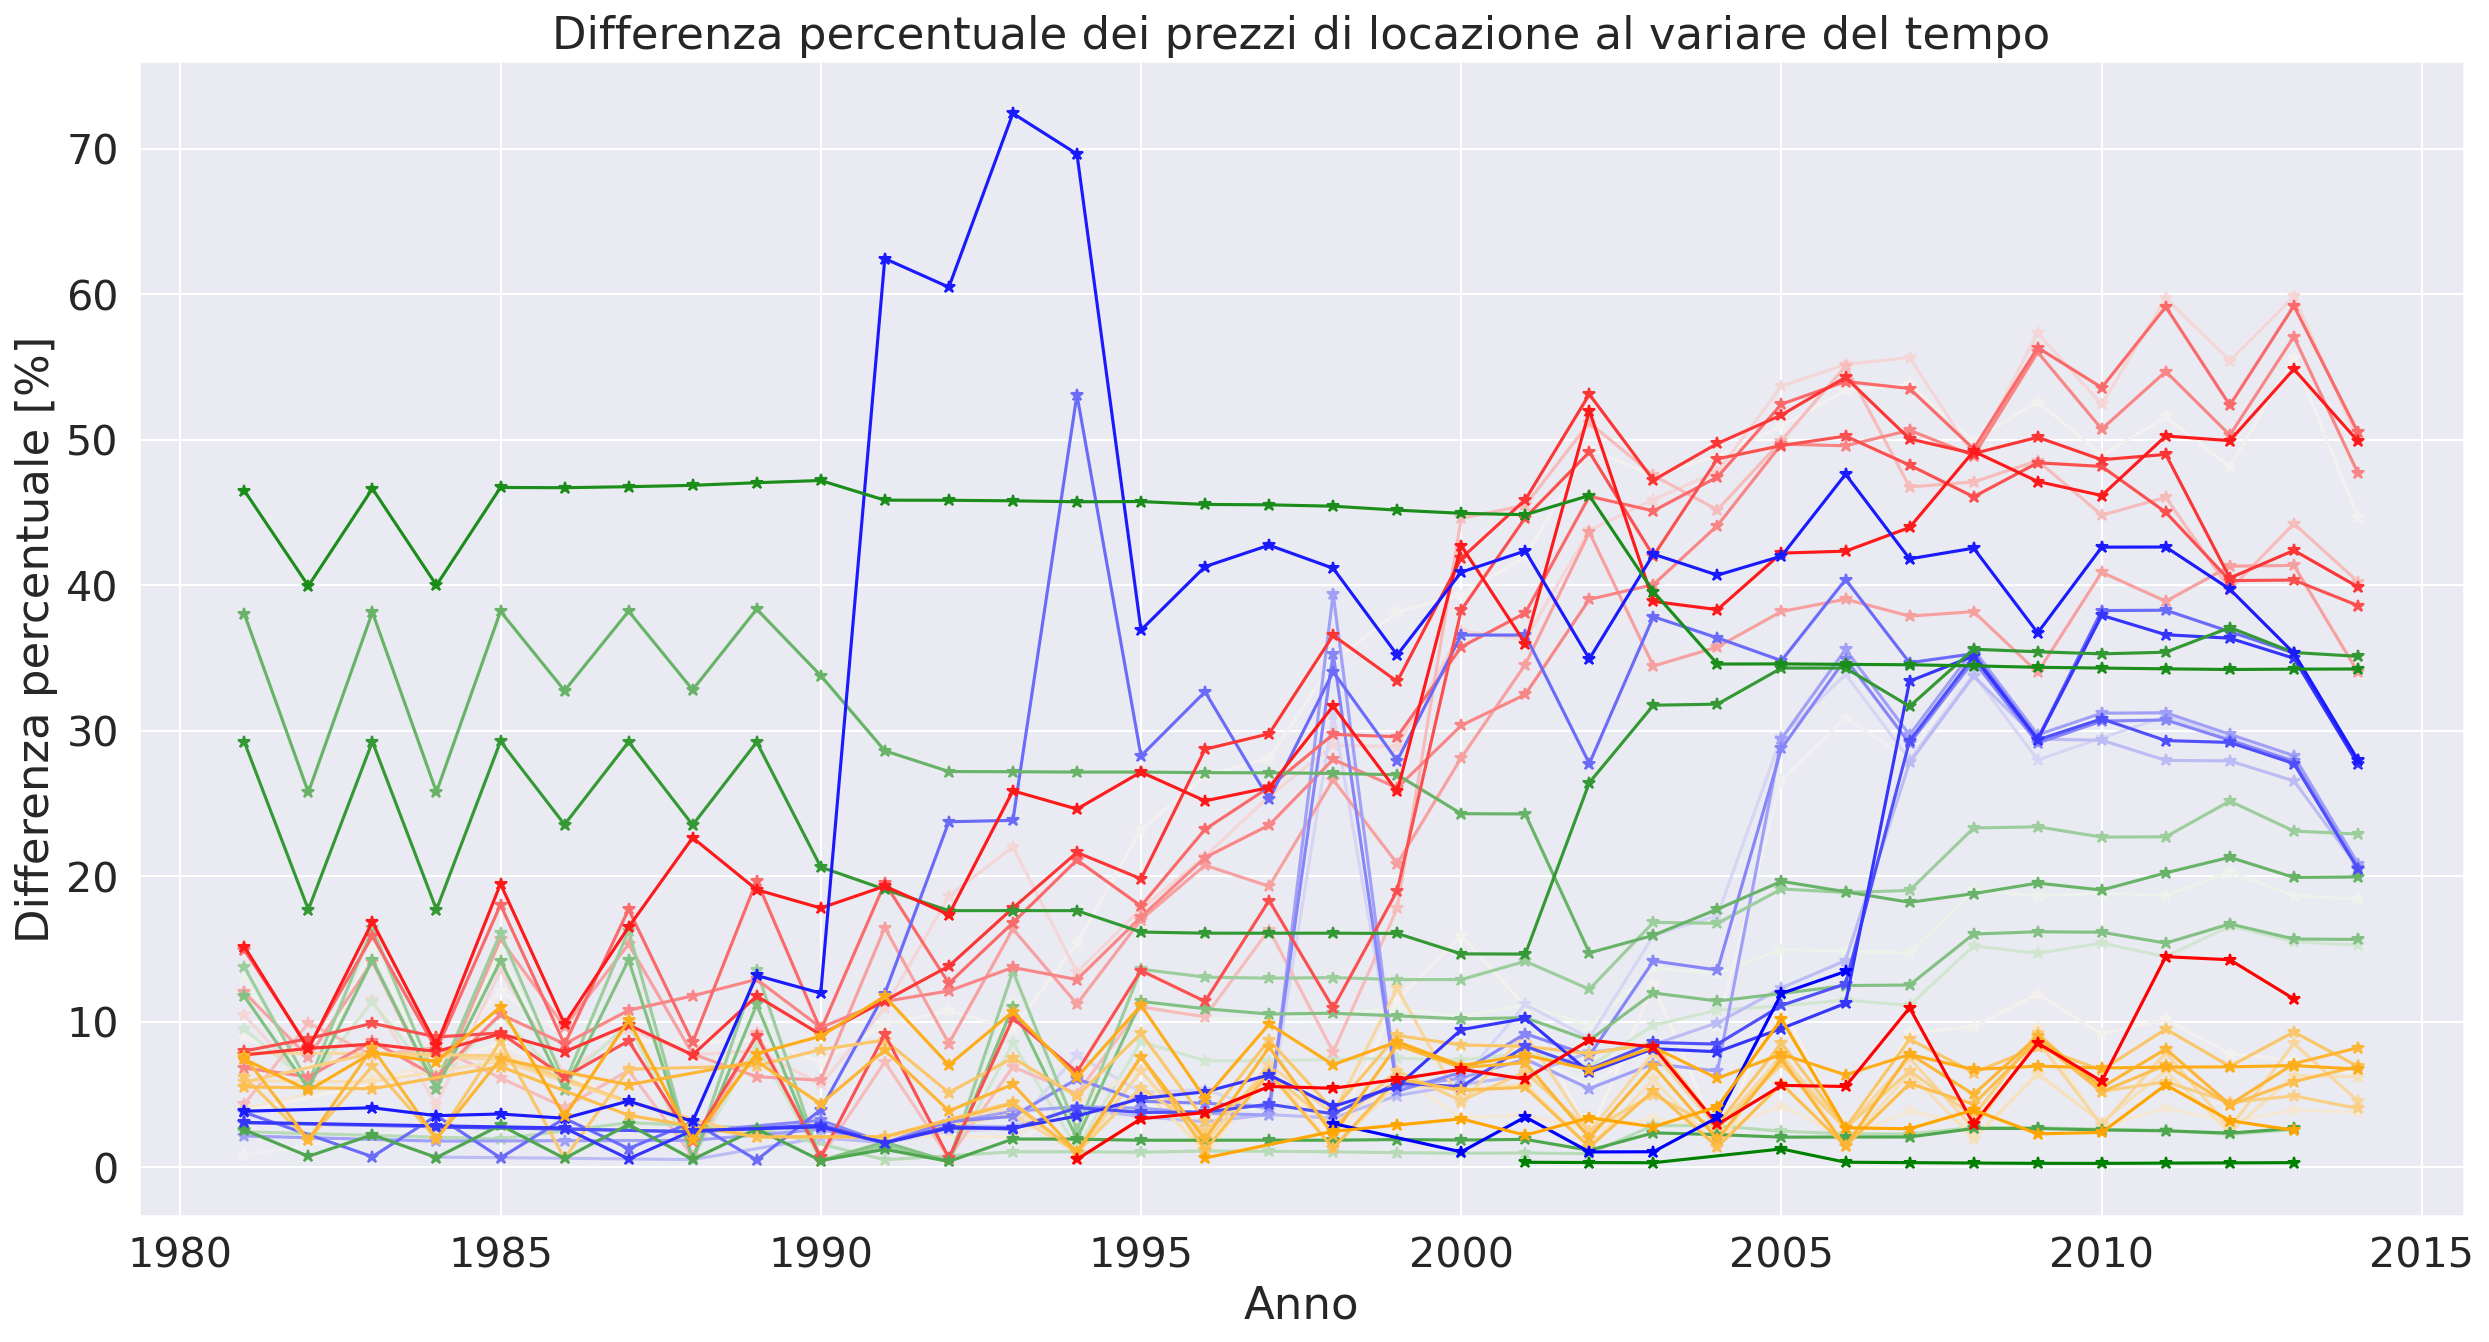

In [141]:
plt.figure(figsize=(20,10))

science = statsind["Science"].unique()
area = statsind["Area"].unique()

j=0
for sc in science: #il colore deve dipendere da sc
    i = 0
    for ar in area: #il tipo di linea deve dipendere da ar
        test = statsind.loc[(statsind.Science == sc) & (statsind.Area == ar)]
        test.drop(test.tail(1).index, inplace=True)
        plt.plot(test.Year, test.Diff_perc,  label = str(sc)+" "+str(ar), color = palettes[i][j], marker = '*')
        i = i+1
    j = j+1

plt.xlabel('Anno')
plt.ylabel('Differenza percentuale [%]')
plt.title('Differenza percentuale dei prezzi di locazione al variare del tempo')
plt.grid(True)
#plt.legend()
plt.show()

### Fit e test di Kolmogrov

### Analisi Correlazione

In [77]:
## Plot correlazione & tabella valori
sns.set_theme(
    "notebook", rc={"figure.dpi": 150, "legend.fontsize": 8, "legend.title_fontsize": 10}, font_scale=0.8
)

In [ ]:
##capire bene quali cose vuoi vedere con lo studio della correlazione e quindi quali grandezze inserire nello studio della correlazione

In [ ]:
#plot correlation matrix

sns.clustermap(df_corr.corr(), vmin =-1, vmax=1, cmap="coolwarm", figsize=(5,5))
plt.show

## Conclusioni